In [ ]:
import cv2
from google.colab import drive
from PIL import Image
import io
import os
import tensorflow as tf
import datetime
from io import BytesIO
from skimage import feature
import numpy as np
from tensorflow.python.keras import layers
from tensorflow.python.keras import models
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

from tensorflow.keras.utils import to_categorical
import keras

#from keras.datasets import mnist, cifar10, cifar100
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import backend as K
from keras.layers import Conv2D, MaxPooling2D, Input, Dense, Flatten, Lambda, concatenate, add
from keras.models import Model
# from custom_layer import Exp_max
import tensorflow as tf
import numpy as np
from skimage.feature import greycomatrix
from tensorflow.keras.utils import plot_model

In [ ]:


def load_data(image_path):
  image_data = []
  image_label = []
  for (root, dirs, file) in os.walk(image_path):
      for f in file:
        l = root.split('/')
        image_label.append(l[-1])
        # image = f.read()
        image = Image.open(root+'/'+f)
        image = image.resize([128, 128], Image.ANTIALIAS)
        image = np.array(image)
        image_data.append(image)
        # print(l[-1],f)
  mapping = {}
  total_image_label = list(set(image_label))
  for x in range(len(total_image_label )):
    mapping[total_image_label[x]] = x

  # integer representation
  for x in range(len(image_label)):
    image_label[x] = mapping[image_label[x]]
  
  return np.array(image_data), np.array(image_label)

In [ ]:


drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_path = "drive/MyDrive/Datasets/KTH/train"
valid_path = "drive/MyDrive/Datasets/KTH/valid"

train_image,train_label = load_data(train_path)
valid_image,valid_label = load_data(valid_path)

In [ ]:
train_image_path = "drive/MyDrive/Datasets/KTH/csv_data/train_image.npy"
train_label_path = "drive/MyDrive/Datasets/KTH/csv_data/train_label.npy"
valid_image_path = "drive/MyDrive/Datasets/KTH/csv_data/valid_image.npy"
valid_label_path = "drive/MyDrive/Datasets/KTH/csv_data/valid_label.npy"

train_image, train_label = np.load(train_image_path), np.load(train_label_path)
valid_image, valid_label = np.load(valid_image_path), np.load(valid_label_path)

In [ ]:
def create_base_model(input_shape):
  
  
  image_input = Input(shape=input_shape)

  # 16 filter convolution
  cov_16 = Conv2D(16, (3, 3), activation='elu')
  
  x = cov_16(image_input)
  

  x = MaxPooling2D((2, 2))(x)
  
  # 32 filter convolution
  cov_32 = Conv2D(64, (3, 3), activation='elu')
  x = cov_32(x)
  
  x = MaxPooling2D((2, 2))(x)
  
 # 64 filter convolution
  cov_64 = Conv2D(128, (3, 3),activation='elu')
  x = cov_64(x)
  
  x = MaxPooling2D((2, 2))(x)
  

  
  final = Flatten()(x)#(final)
  
  # final = Dense(2024, activation='elu')(final)
  # final = BatchNormalization()(final)
  # final = Dropout(0.2)(final)

  

  final = Dense(512, activation='elu')(final)
  final = BatchNormalization()(final)
  final = Dropout(0.3)(final)

 

  final = Dense(512, activation='elu')(final)
  final = BatchNormalization()(final)
  final = Dropout(0.3)(final)

  out = Dense(11, activation='softmax')(final)
  model = Model(image_input, out)
  return model



Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        9280      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       7385

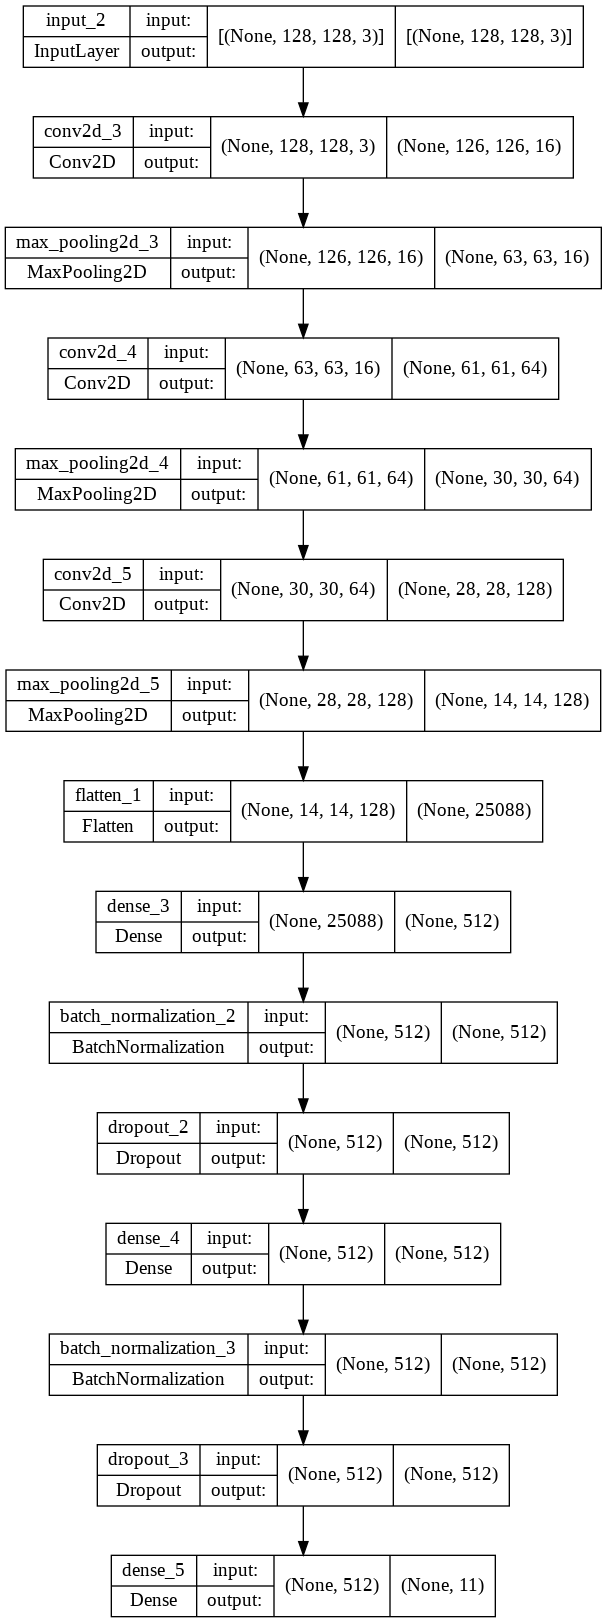

In [ ]:

input_shape = (128,128,3)
model = create_base_model(input_shape)
print(model.summary())

model.compile(
      # optimizer=tf.keras.optimizers.Adadelta(learning_rate=1e-3, ),
      optimizer=tf.keras.optimizers.Adam(learning_rate=1e-6, amsgrad=True,
 ),
      loss='sparse_categorical_crossentropy',
      metrics=['sparse_categorical_accuracy'])
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(train_image.astype('float32'),train_label, 
                    epochs = 300,
                    validation_data=(valid_image.astype('float32'), valid_label),
                    batch_size=128
)

Epoch 1/300
13/13 [==============================] - 4s 193ms/step - loss: 3.2406 - sparse_categorical_accuracy: 0.0991 - val_loss: 5.3827 - val_sparse_categorical_accuracy: 0.1225
Epoch 2/300
13/13 [==============================] - 2s 163ms/step - loss: 2.8911 - sparse_categorical_accuracy: 0.1618 - val_loss: 3.6546 - val_sparse_categorical_accuracy: 0.2288
Epoch 3/300
13/13 [==============================] - 2s 153ms/step - loss: 2.6136 - sparse_categorical_accuracy: 0.2075 - val_loss: 3.1465 - val_sparse_categorical_accuracy: 0.2344
Epoch 4/300
13/13 [==============================] - 2s 152ms/step - loss: 2.3853 - sparse_categorical_accuracy: 0.2740 - val_loss: 2.9434 - val_sparse_categorical_accuracy: 0.2131
Epoch 5/300
13/13 [==============================] - 2s 153ms/step - loss: 2.2617 - sparse_categorical_accuracy: 0.2865 - val_loss: 2.8818 - val_sparse_categorical_accuracy: 0.2219
Epoch 6/300
13/13 [==============================] - 2s 152ms/step - loss: 2.1046 - sparse_cate

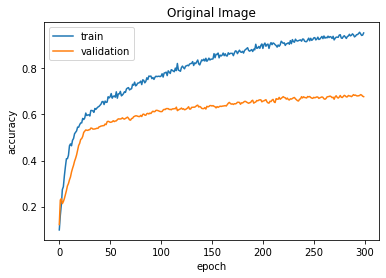

In [ ]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Original Image')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()